# ImmoEliza Data Analysis (test)

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [78]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [83]:
properties_raw = pd.read_csv("scraped_data_10.csv")
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
0,€,Grote Markt 22,4,C,218,No,0,30,0,0,...,As new,0,1,0,0,2,0,Gas,10666429,2300
1,€469000,Heidestatiestraat 26,3,D,390,No,Yes,0,760,34,...,0,0,1,0,0,2,Installed,0,10666428,2910
2,€1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,10666426,1301
3,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666424,6700
4,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666423,6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,€1199000,Donksesteenweg 212,6,B,199,No,Yes,0,2790,0,...,As new,0,2,0,No,3,Installed,Gas,10642946,2970
10134,€450000,Herbert Hooverplein 14,3,B,120,No,0,9,0,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,3360,20
10135,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,0,0,0,0,...,0,0,2,0,0,0,0,0,1420,27
10136,€340000,Markeplaats 9,4,B,161,0,Yes,0,621,0,...,0,0,0,0,No,0,0,0,10642937,8560


## Export Data

In [72]:
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE in the same folder as this notebook"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

In [ ]:
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("saved_data.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

## Cleaning Data

In [124]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.iloc[:, 1].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.iloc[:, 0].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


9014
9014
9014


In [129]:
# Remove all non-numerical data from Price

properties_raw["Price2"] = properties_raw.iloc[:, 0].str.replace("\D", "", regex = True)


In [131]:
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #removes rows without a price
print(properties_raw.shape[0])

9014
8870


In [134]:
properties_raw["Price2"] = properties_raw["Price2"].astype(int)

In [ ]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

In [132]:
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code,Terrace2,Price2
1,469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,1,0,0,2,Installed,0,10666428,2910,1,469000
2,1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,2,3,1,4,Hyper equipped,Fuel oil,10666426,1301,1,1395000
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666424,6700,0,285000
4,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666423,6700,0,285000
5,425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,1,0,0,0,Installed,0,10666422,2000,1,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,2,0,0,3,Installed,Gas,10642946,2970,1,1199000
10134,450000,Herbert Hooverplein 14,3,B,120,0,1,9,0,0,...,2,0,0,0,Hyper equipped,Gas,3360,20,1,450000
10135,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,0,0,0,0,...,2,0,0,0,0,0,1420,27,0,699000
10136,340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,0,0,0,10642937,8560,1,340000


In [100]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])

In [102]:
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw.drop(["Terrace2"], axis=1)

In [97]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [103]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    2001
B                1448
C                1359
D                1138
F                1117
E                 822
A                 575
G                 499
A++                31
A+                 24
Name: count, dtype: int64


In [75]:
print(properties_raw[["postal code"]].value_counts())

postal code
20             522
3              233
8300           224
9000           208
8370           163
              ... 
6182             1
6181             1
6142             1
6111             1
100000           1
Name: count, Length: 853, dtype: int64


### .info() & .describe()

In [135]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8870 entries, 1 to 10137
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Price                       8870 non-null   object
 1   Address                     8870 non-null   object
 2   Bedrooms                    8870 non-null   int64 
 3   Energy class                8870 non-null   object
 4   Primary energy consumption  8870 non-null   object
 5   Furnished                   8870 non-null   int64 
 6   Terrace                     8870 non-null   int64 
 7   Terrace surface             8870 non-null   int64 
 8   Surface of the plot         8870 non-null   int64 
 9   Living room surface         8870 non-null   int64 
 10  Number of frontages         8870 non-null   int64 
 11  Construction year           8870 non-null   int64 
 12  Building condition          8870 non-null   object
 13  Outdoor parking space       8870 non-null   int64 
 

In [67]:
properties_raw.describe()

,Bedrooms,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bathrooms,Shower rooms,Toilets,immo_code,postal code
count,9014.000000,9014.000000,9.014000e+03,9014.000000,9014.000000,9014.00000,9014.0,9014.000000,9014.000000,9014.000000,9.014000e+03,9014.000000
mean,2.923674,8.670402,8.579023e+02,15.461615,1.967162,1208.58043,0.0,1.204793,0.327269,1.293543,9.595604e+06,4892.592634
std,1.822523,22.634069,1.253383e+04,32.162122,1.511533,963.66892,0.0,1.075532,1.925685,1.324072,3.171771e+06,4007.516209
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.0,0.000000,-1.000000,0.000000,0.000000e+00,2.000000
25%,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.0,1.000000,0.000000,0.000000,1.064567e+07,1650.000000
50%,3.000000,0.000000,1.140000e+02,0.000000,2.000000,1942.00000,0.0,1.000000,0.000000,1.000000,1.065326e+07,3970.000000
75%,4.000000,10.000000,5.330000e+02,30.000000,3.000000,1990.00000,0.0,1.000000,0.000000,2.000000,1.065994e+07,8450.000000
max,60.000000,663.000000,1.090481e+06,2340.000000,26.000000,2025.00000,0.0,27.000000,116.000000,20.000000,1.066718e+07,100000.000000


In [ ]:
sns.scatterplot(x="Energy class", y="Price2", data=properties_raw)
plt.show()

In [147]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
print(ordered_E_class)

['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']


<Axes: xlabel='Energy class', ylabel='count'>

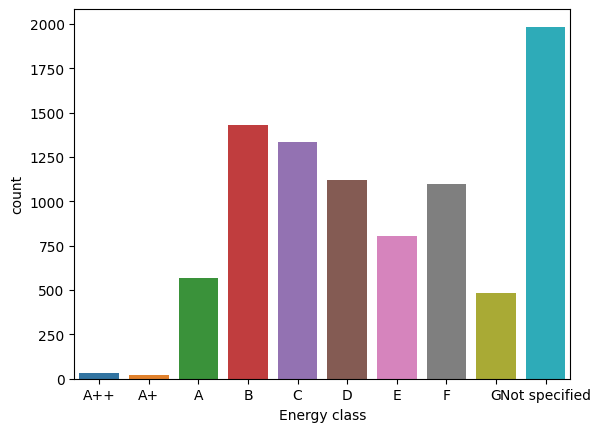

In [151]:
sns.countplot(x="Energy class", data=properties_raw, order=ordered_E_class)

<Axes: xlabel='Energy class', ylabel='Price2'>

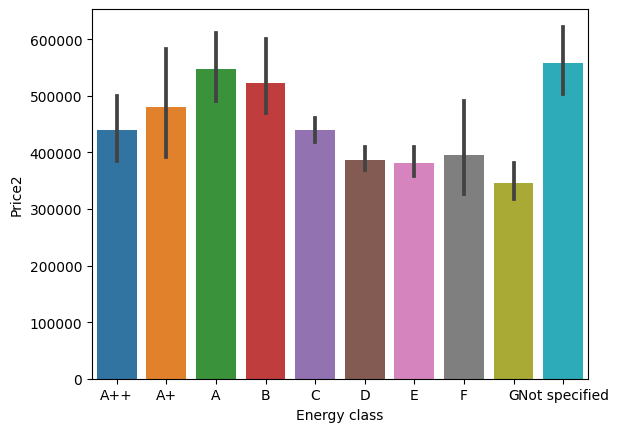

In [148]:
sns.barplot(x="Energy class", y="Price2", data=properties_raw, order=ordered_E_class)
